# Final Project – Economic Applications of Machine Learning
# Chess Chess Games Classification
**Team: Adilkhan Sanzhar, Kozachenko Maksim, Kyu Daniil, Sonin Artemiy**

In [120]:
import warnings
warnings.filterwarnings("ignore")

In [301]:
import pandas as pd

df = pd.read_csv("200k_blitz_rapid_classical_bullet.csv", nrows = 10000, low_memory=False)

df.head()

,Index,Index.1,Black,BlackElo,BlackRatingDiff,Date,ECO,Event,Opening,Result,...,Clock_ply_193,Clock_ply_194,Clock_ply_195,Clock_ply_196,Clock_ply_197,Clock_ply_198,Clock_ply_199,Clock_ply_200,Category,Weekday
0,0,124,albertoPlasta,906,13.0,2019.04.30,B15,Rated Blitz game,Caro-Kann Defense,0-1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Blitz,Tuesday
1,1,494,Luckystriker,1296,28.0,2019.04.30,C50,Rated Blitz game,Italian Game,0-1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Blitz,Tuesday
2,2,552,Verascardoso,1761,-13.0,2019.04.30,C41,Rated Rapid game,Philidor Defense #2,1-0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Rapid,Tuesday
3,3,588,Stockfish94,2404,8.0,2019.04.30,B06,Rated Bullet game,Modern Defense,0-1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bullet,Tuesday
4,4,725,deneme12376,1595,-10.0,2019.04.30,B32,Rated Blitz game,Sicilian Defense: Loewenthal Variation,1-0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Blitz,Tuesday


In [302]:
df["Termination"].value_counts()

Normal              7598
Time forfeit        2401
Rules infraction       1
Name: Termination, dtype: int64

In [303]:
df.columns.tolist()

['Index',
 'Index.1',
 'Black',
 'BlackElo',
 'BlackRatingDiff',
 'Date',
 'ECO',
 'Event',
 'Opening',
 'Result',
 'Round',
 'Site',
 'Termination',
 'TimeControl',
 'UTCDate',
 'UTCTime',
 'White',
 'WhiteElo',
 'WhiteRatingDiff',
 'BlackTitle',
 'WhiteTitle',
 'Move_ply_1',
 'Move_ply_2',
 'Move_ply_3',
 'Move_ply_4',
 'Move_ply_5',
 'Move_ply_6',
 'Move_ply_7',
 'Move_ply_8',
 'Move_ply_9',
 'Move_ply_10',
 'Move_ply_11',
 'Move_ply_12',
 'Move_ply_13',
 'Move_ply_14',
 'Move_ply_15',
 'Move_ply_16',
 'Move_ply_17',
 'Move_ply_18',
 'Move_ply_19',
 'Move_ply_20',
 'Move_ply_21',
 'Move_ply_22',
 'Move_ply_23',
 'Move_ply_24',
 'Move_ply_25',
 'Move_ply_26',
 'Move_ply_27',
 'Move_ply_28',
 'Move_ply_29',
 'Move_ply_30',
 'Move_ply_31',
 'Move_ply_32',
 'Move_ply_33',
 'Move_ply_34',
 'Move_ply_35',
 'Move_ply_36',
 'Move_ply_37',
 'Move_ply_38',
 'Move_ply_39',
 'Move_ply_40',
 'Move_ply_41',
 'Move_ply_42',
 'Move_ply_43',
 'Move_ply_44',
 'Move_ply_45',
 'Move_ply_46',
 'Move_ply

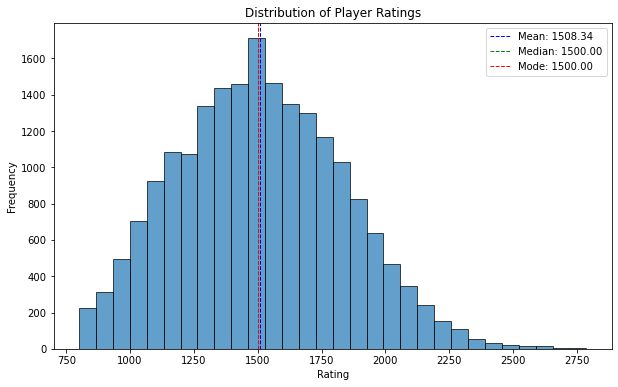

In [304]:
import pandas as pd
import matplotlib.pyplot as plt

ratings = df[['WhiteElo', 'BlackElo']].values.flatten()

ratings = ratings[~pd.isna(ratings)]

mean_rating = ratings.mean()
median_rating = pd.Series(ratings).median()
mode_rating = pd.Series(ratings).mode()[0]

plt.figure(figsize=(10, 6))
plt.hist(ratings, bins=30, edgecolor='black', alpha=0.7)
plt.axvline(mean_rating, color='blue', linestyle='dashed', linewidth=1, label=f'Mean: {mean_rating:.2f}')
plt.axvline(median_rating, color='green', linestyle='dashed', linewidth=1, label=f'Median: {median_rating:.2f}')
plt.axvline(mode_rating, color='red', linestyle='dashed', linewidth=1, label=f'Mode: {mode_rating:.2f}')
plt.title("Distribution of Player Ratings")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.legend()
plt.show()

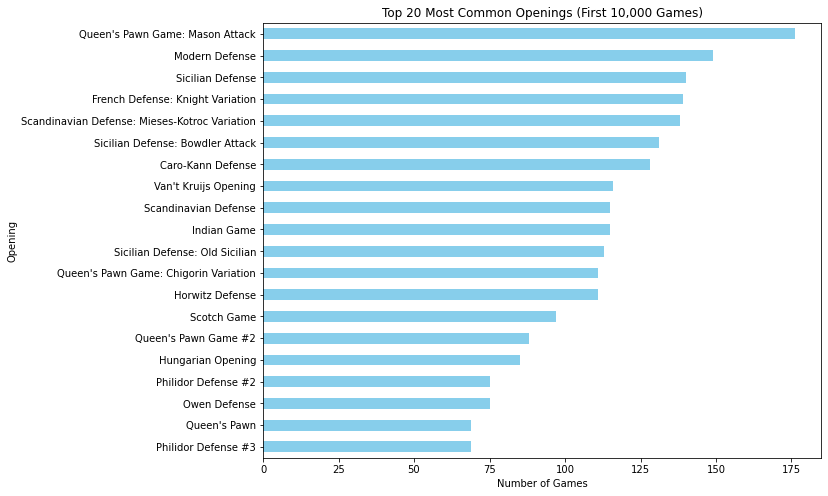

In [305]:
opening_counts = df['Opening'].value_counts().head(20) 

plt.figure(figsize=(10, 8))
opening_counts.plot(kind='barh', color='skyblue')
plt.title("Top 20 Most Common Openings (First 10,000 Games)")
plt.xlabel("Number of Games")
plt.ylabel("Opening")
plt.gca().invert_yaxis()
plt.show()


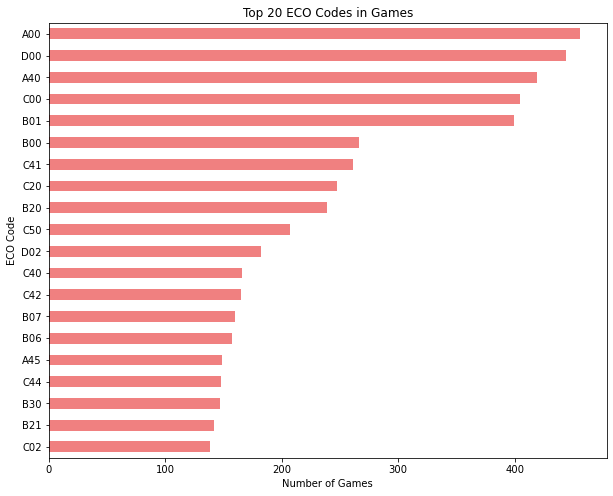

In [306]:
import matplotlib.pyplot as plt

eco_counts = df['ECO'].value_counts().head(20)

plt.figure(figsize=(10, 8))
eco_counts.plot(kind='barh', color='lightcoral')
plt.title("Top 20 ECO Codes in Games")
plt.xlabel("Number of Games")
plt.ylabel("ECO Code")
plt.gca().invert_yaxis() 
plt.show()

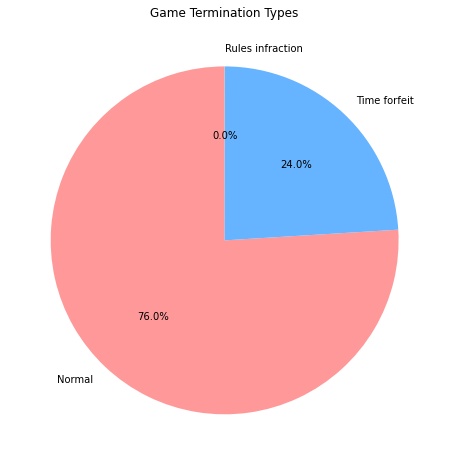

In [307]:
import matplotlib.pyplot as plt

termination_counts = df['Termination'].value_counts()

plt.figure(figsize=(8, 8))
termination_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'])
plt.title("Game Termination Types")
plt.ylabel('') 
plt.show()

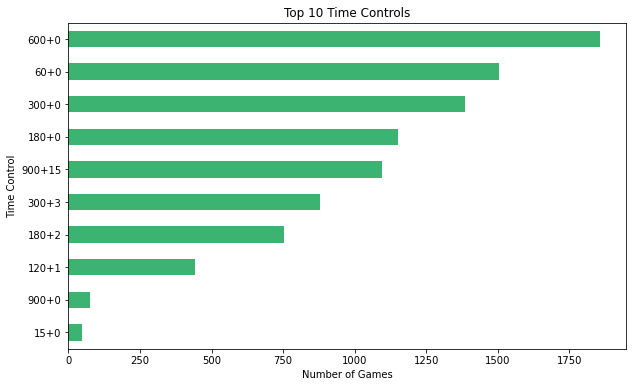

In [308]:
import matplotlib.pyplot as plt

time_control_counts = df['TimeControl'].value_counts().head(10)

plt.figure(figsize=(10, 6))
time_control_counts.plot(kind='barh', color='mediumseagreen')
plt.title("Top 10 Time Controls")
plt.xlabel("Number of Games")
plt.ylabel("Time Control")
plt.gca().invert_yaxis()
plt.show()

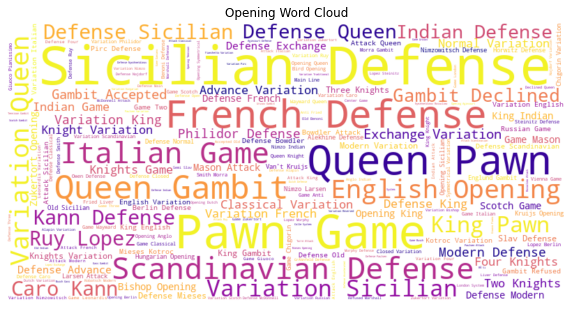

In [309]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

opening_text = ' '.join(df['Opening'].dropna().astype(str))

wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='plasma').generate(opening_text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Opening Word Cloud")
plt.show()

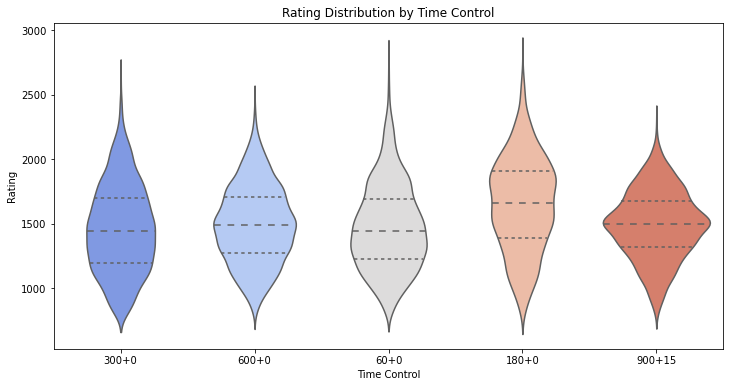

In [310]:
import seaborn as sns
import matplotlib.pyplot as plt
time_control_rating_df = df[['TimeControl', 'WhiteElo', 'BlackElo']].melt(id_vars=['TimeControl'], 
                                                                          value_vars=['WhiteElo', 'BlackElo'], 
                                                                          var_name='Player', value_name='Rating')
time_control_rating_df = time_control_rating_df.dropna(subset=['Rating'])

top_time_controls = time_control_rating_df['TimeControl'].value_counts().nlargest(5).index
filtered_df = time_control_rating_df[time_control_rating_df['TimeControl'].isin(top_time_controls)]

plt.figure(figsize=(12, 6))
sns.violinplot(data=filtered_df, x='TimeControl', y='Rating', palette='coolwarm', inner='quartile')
plt.title("Rating Distribution by Time Control")
plt.xlabel("Time Control")
plt.ylabel("Rating")
plt.show()

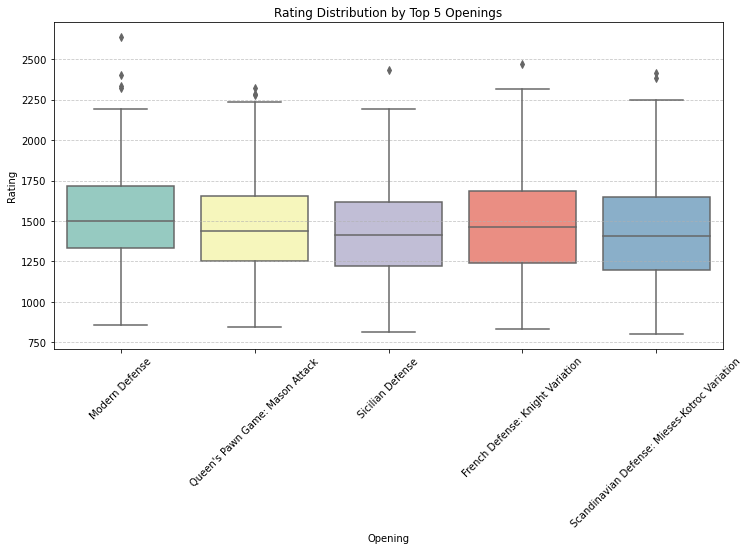

In [311]:
import seaborn as sns
import matplotlib.pyplot as plt

top_openings = df['Opening'].value_counts().nlargest(5).index
filtered_df = df[df['Opening'].isin(top_openings)]

opening_rating_df = filtered_df[['Opening', 'WhiteElo', 'BlackElo']].melt(id_vars=['Opening'], 
                                                                          value_vars=['WhiteElo', 'BlackElo'], 
                                                                          var_name='Player', value_name='Rating')

opening_rating_df = opening_rating_df.dropna(subset=['Rating'])

plt.figure(figsize=(12, 6))
sns.boxplot(data=opening_rating_df, x='Opening', y='Rating', palette='Set3')
plt.title("Rating Distribution by Top 5 Openings")
plt.xlabel("Opening")
plt.ylabel("Rating")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

<Figure size 720x432 with 0 Axes>

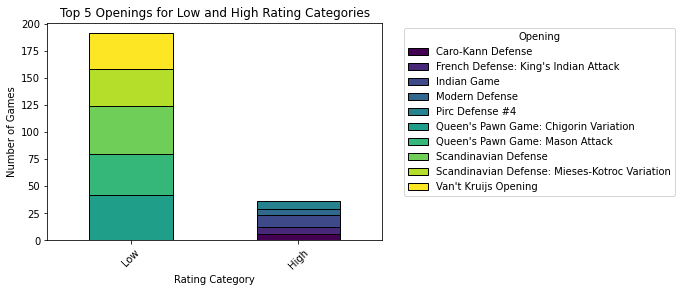

In [312]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

ratings_openings_df = df[['Opening', 'WhiteElo', 'BlackElo']].copy()

rating_bins = [0, 1200, 1600, 2000, 2500]
rating_labels = ['Low', 'Below Average', 'Above Average', 'High']
ratings_openings_df['RatingCategory'] = pd.cut(ratings_openings_df[['WhiteElo', 'BlackElo']].mean(axis=1), 
                                               bins=rating_bins, labels=rating_labels)

filtered_df = ratings_openings_df[ratings_openings_df['RatingCategory'].isin(['Low', 'High'])]

popular_openings_by_rating = filtered_df.groupby('RatingCategory')['Opening'] \
    .apply(lambda x: x.value_counts().head(5)).unstack().fillna(0)

plt.figure(figsize=(10, 6))
popular_openings_by_rating.plot(kind='bar', stacked=True, colormap='viridis', edgecolor='black')
plt.title("Top 5 Openings for Low and High Rating Categories")
plt.xlabel("Rating Category")
plt.ylabel("Number of Games")
plt.xticks(rotation=45)
plt.legend(title="Opening", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

<Figure size 864x432 with 0 Axes>

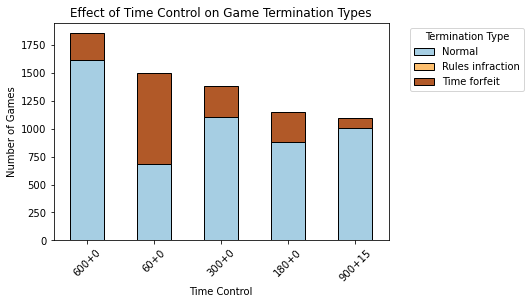

In [313]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

time_termination_df = df[['TimeControl', 'Termination']].dropna()

time_termination_counts = time_termination_df.groupby(['TimeControl', 'Termination']).size().unstack().fillna(0)

top_time_controls = time_termination_counts.sum(axis=1).nlargest(5).index
filtered_counts = time_termination_counts.loc[top_time_controls]

plt.figure(figsize=(12, 6))
filtered_counts.plot(kind='bar', stacked=True, colormap='Paired', edgecolor='black')
plt.title("Effect of Time Control on Game Termination Types")
plt.xlabel("Time Control")
plt.ylabel("Number of Games")
plt.xticks(rotation=45)
plt.legend(title="Termination Type", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

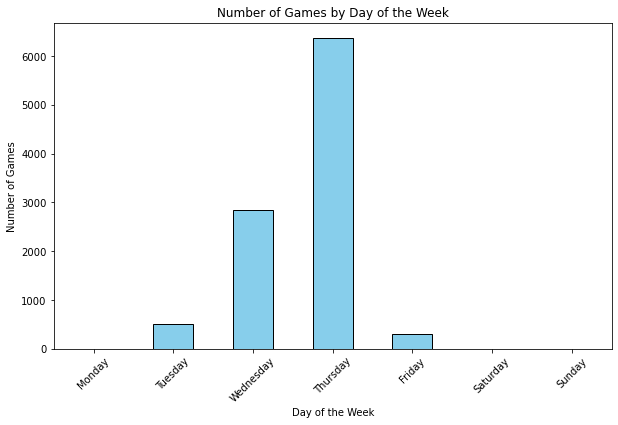

In [314]:
import matplotlib.pyplot as plt

weekday_counts = df['Weekday'].value_counts().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

plt.figure(figsize=(10, 6))
weekday_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Number of Games by Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Number of Games")
plt.xticks(rotation=45)
plt.show()

In [316]:
df["Eval_ply_3"]

0      -0.15
1       0.23
2       0.23
3       0.28
4       0.21
        ... 
9995    0.26
9996    0.20
9997   -0.43
9998    0.26
9999    0.26
Name: Eval_ply_3, Length: 10000, dtype: float64

In [317]:
import pandas as pd

delta_df = pd.DataFrame(index=df.index)

# Проходим по всем ходам, начиная со второго (для первого хода нет предыдущей оценки)
for i in range(2, 200):  # Начинаем с 2, чтобы всегда был предыдущий ход
    current_eval_col = f'Eval_ply_{i}'     # Оценка после текущего хода
    previous_eval_col = f'Eval_ply_{i - 1}' # Оценка после предыдущего хода
    delta_col = f'Delta_ply_{i}'           # Название для колонки с дельтой после текущего хода
    
    if current_eval_col in df.columns and previous_eval_col in df.columns:
        df[current_eval_col] = pd.to_numeric(df[current_eval_col], errors='coerce')
        df[previous_eval_col] = pd.to_numeric(df[previous_eval_col], errors='coerce')
        
        delta_df[delta_col] = df[current_eval_col] - df[previous_eval_col]

delta_df.head()

,Delta_ply_2,Delta_ply_3,Delta_ply_4,Delta_ply_5,Delta_ply_6,Delta_ply_7,Delta_ply_8,Delta_ply_9,Delta_ply_10,Delta_ply_11,...,Delta_ply_190,Delta_ply_191,Delta_ply_192,Delta_ply_193,Delta_ply_194,Delta_ply_195,Delta_ply_196,Delta_ply_197,Delta_ply_198,Delta_ply_199
0,-0.10,-0.30,0.62,-0.34,0.59,-0.06,-0.15,-0.51,1.63,-1.07,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.25,-0.14,-0.08,0.06,0.25,-0.10,0.02,0.10,-0.12,0.02,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.25,-0.14,0.36,-0.43,0.48,-0.17,0.33,0.14,0.01,-0.23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.34,-0.18,0.62,-0.21,0.28,-0.06,0.03,-0.09,-0.08,0.14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.08,0.01,-0.13,0.07,0.07,-0.14,0.29,-0.12,0.60,-0.33,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [318]:
delta_df

,Delta_ply_2,Delta_ply_3,Delta_ply_4,Delta_ply_5,Delta_ply_6,Delta_ply_7,Delta_ply_8,Delta_ply_9,Delta_ply_10,Delta_ply_11,...,Delta_ply_190,Delta_ply_191,Delta_ply_192,Delta_ply_193,Delta_ply_194,Delta_ply_195,Delta_ply_196,Delta_ply_197,Delta_ply_198,Delta_ply_199
0,-0.10,-0.30,0.62,-0.34,0.59,-0.06,-0.15,-0.51,1.63,-1.07,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.25,-0.14,-0.08,0.06,0.25,-0.10,0.02,0.10,-0.12,0.02,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.25,-0.14,0.36,-0.43,0.48,-0.17,0.33,0.14,0.01,-0.23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.34,-0.18,0.62,-0.21,0.28,-0.06,0.03,-0.09,-0.08,0.14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.08,0.01,-0.13,0.07,0.07,-0.14,0.29,-0.12,0.60,-0.33,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.00,0.01,-0.05,-0.14,-0.09,-0.06,0.29,-0.80,0.65,-0.06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9996,0.18,-0.13,0.01,-0.07,0.11,-0.33,0.28,-0.36,0.23,-0.28,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9997,0.13,-0.80,0.43,-0.60,-0.19,-0.10,0.29,-0.07,0.59,-0.35,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9998,0.13,-0.11,0.29,-0.15,0.19,-0.34,0.15,-0.05,0.22,-0.19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


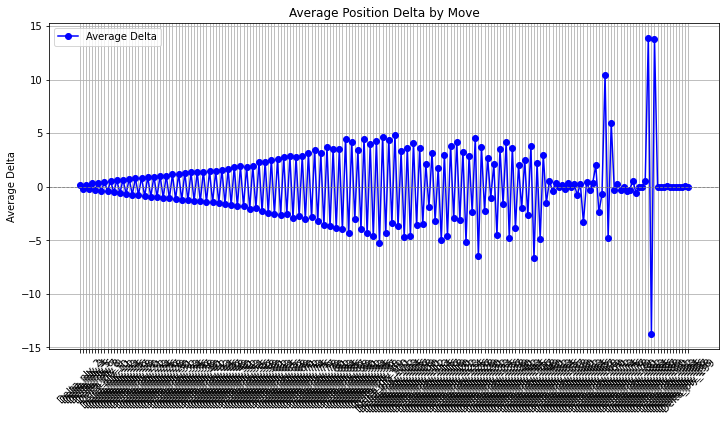

In [319]:
import matplotlib.pyplot as plt

mean_deltas = delta_df.mean()

plt.figure(figsize=(12, 6))
plt.plot(mean_deltas.index, mean_deltas.values, marker='o', color='b', linestyle='-', label='Average Delta')
plt.axhline(0, color='gray', linestyle='--', linewidth=0.8)
plt.title("Average Position Delta by Move")
plt.ylabel("Average Delta")
plt.xticks(rotation=45)
plt.grid()
plt.legend()
plt.show()

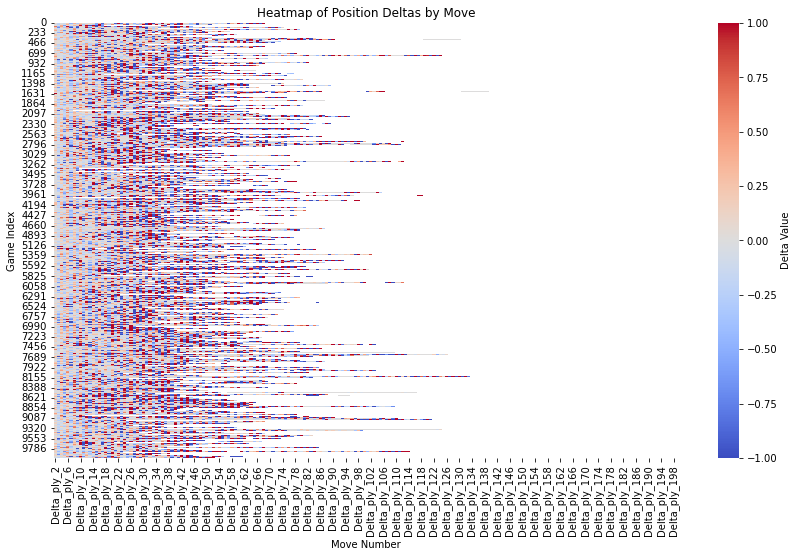

In [320]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 8))
sns.heatmap(delta_df, cmap='coolwarm', center=0, vmin=-1, vmax=1, cbar_kws={'label': 'Delta Value'})
plt.title("Heatmap of Position Deltas by Move")
plt.xlabel("Move Number")
plt.ylabel("Game Index")
plt.show()

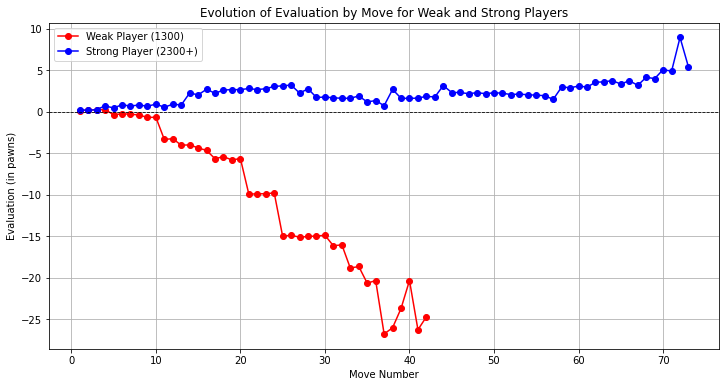

In [321]:
import matplotlib.pyplot as plt

weak_player_game = df[(df['WhiteElo'] <= 1200) & (df['BlackElo'] <= 1200)].iloc[1]

strong_player_game = df[(df['WhiteElo'] >= 2300) & (df['BlackElo'] >= 2300)].iloc[1]

weak_eval = [weak_player_game[f'Eval_ply_{i}'] for i in range(1, 100) if f'Eval_ply_{i}' in weak_player_game]
strong_eval = [strong_player_game[f'Eval_ply_{i}'] for i in range(1, 100) if f'Eval_ply_{i}' in strong_player_game]

weak_eval = pd.to_numeric(weak_eval, errors='coerce')
strong_eval = pd.to_numeric(strong_eval, errors='coerce')

moves = list(range(1, len(weak_eval) + 1))

plt.figure(figsize=(12, 6))
plt.plot(moves, weak_eval, label="Weak Player (1300)", color='red', marker='o')
plt.plot(moves, strong_eval, label="Strong Player (2300+)", color='blue', marker='o')
plt.axhline(0, color='black', linestyle='--', linewidth=0.8)  # Линия нуля для нейтральной оценки

plt.title("Evolution of Evaluation by Move for Weak and Strong Players")
plt.xlabel("Move Number")
plt.ylabel("Evaluation (in pawns)")
plt.legend()
plt.grid()
plt.show()

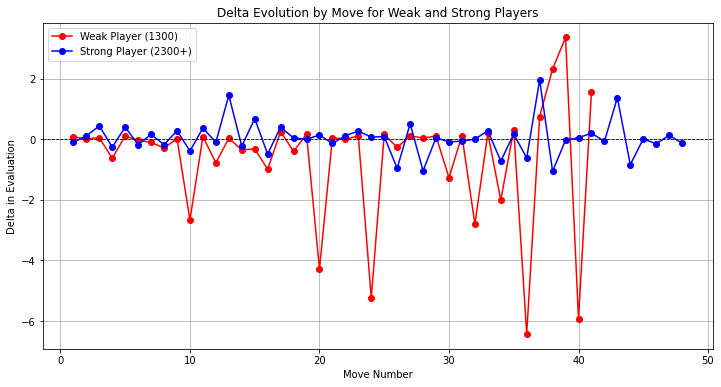

In [322]:
import matplotlib.pyplot as plt
import pandas as pd

weak_player_game = df[(df['WhiteElo'] <= 1300) & (df['BlackElo'] <= 1300)].iloc[1]

strong_player_game = df[(df['WhiteElo'] >= 2300) & (df['BlackElo'] >= 2300)].iloc[1]

weak_deltas = [weak_player_game[f'Eval_ply_{i+1}'] - weak_player_game[f'Eval_ply_{i}']
               for i in range(1, 49) if f'Eval_ply_{i}' in weak_player_game and f'Eval_ply_{i+1}' in weak_player_game]

strong_deltas = [strong_player_game[f'Eval_ply_{i+1}'] - strong_player_game[f'Eval_ply_{i}']
                 for i in range(1, 49) if f'Eval_ply_{i}' in strong_player_game and f'Eval_ply_{i+1}' in strong_player_game]

weak_deltas = pd.to_numeric(weak_deltas, errors='coerce')
strong_deltas = pd.to_numeric(strong_deltas, errors='coerce')

moves = list(range(1, len(weak_deltas) + 1))

plt.figure(figsize=(12, 6))
plt.plot(moves, weak_deltas, label="Weak Player (1300)", color='red', marker='o')
plt.plot(moves, strong_deltas, label="Strong Player (2300+)", color='blue', marker='o')
plt.axhline(0, color='black', linestyle='--', linewidth=0.8)  # Линия нуля для нейтральной дельты

plt.title("Delta Evolution by Move for Weak and Strong Players")
plt.xlabel("Move Number")
plt.ylabel("Delta in Evaluation")
plt.legend()
plt.grid()
plt.show()

In [323]:
# Выбираем одну игру для сильного игрока с рейтингом выше 2300
strong_player_game = df[(df['WhiteElo'] >= 2300) & (df['BlackElo'] >= 2300)].iloc[1]

# Выводим значение Site для этой игры
site_strong_player = strong_player_game['Site']
print("Site for the strong player's game:", site_strong_player)

Site for the strong player's game: https://lichess.org/S0ktzV14


In [324]:
df["Eval_ply_35"].mean()

-0.14888789237668162